In [308]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.datasets import make_blobs

In [309]:
x,y= make_blobs(n_samples=1000,centers=4,n_features=10)

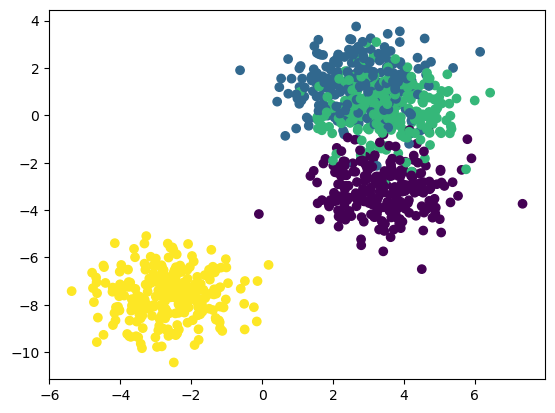

In [310]:
plt.scatter(x[:,0],x[:,1],c=y)

In [311]:
#standardization -- feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [312]:
from sklearn.model_selection import train_test_split

In [313]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state=42)

In [314]:
X_trained= scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [315]:
from sklearn.cluster import KMeans

In [316]:
from sklearn.cluster import KMeans
import numpy as np

X_trained = np.random.rand(100, 2)  # Dummy data

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init='auto', random_state=42)  # ✅ Fixed warning
    kmeans.fit(X_trained)
    wcss.append(kmeans.inertia_)

print("WCSS values:", wcss)


WCSS values: [16.410823026828545, 10.070484073118926, 6.2569187009335545, 3.6307524528160533, 3.0553679706219037, 2.5449388554854857, 2.212251656201908, 1.6256140367730627, 1.4486276118880805, 1.348803761956952]


In [317]:
wcss

[16.410823026828545,
 10.070484073118926,
 6.2569187009335545,
 3.6307524528160533,
 3.0553679706219037,
 2.5449388554854857,
 2.212251656201908,
 1.6256140367730627,
 1.4486276118880805,
 1.348803761956952]

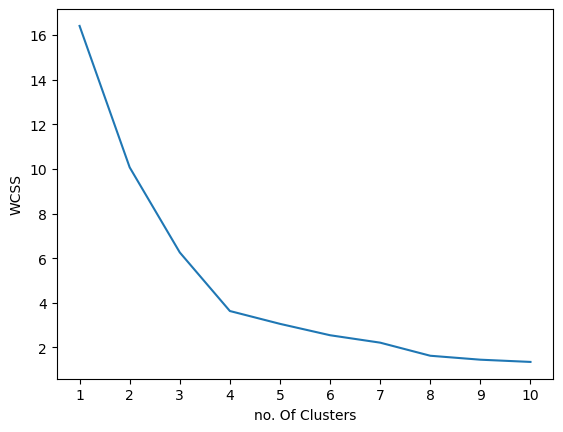

In [318]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("no. Of Clusters")
plt.ylabel("WCSS")
plt.show()

In [319]:
#now we will validate the k value 
# knee locater 
#Silhouee Scorng

In [320]:
!pip install kneed

In [321]:
import sys
print(sys.executable)


/opt/homebrew/anaconda3/bin/python


In [322]:
import sys
!{sys.executable} -m pip install kneed


In [323]:
from kneed import KneeLocator

In [324]:
K1 = KneeLocator(range(1,11),wcss,curve  = "convex", direction = "decreasing")

In [325]:
K1.elbow

4

In [326]:
from sklearn.metrics import silhouette_score


In [327]:
silhouette_coefficient  = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init='auto', random_state=42)
    kmeans.fit(X_trained)
    score = silhouette_score(X_trained,kmeans.labels_)
    silhouette_coefficient.append(score)

In [328]:
silhouette_coefficient

[0.37425569584819635,
 0.3711288181063,
 0.4437236766782312,
 0.4002113829250976,
 0.3850382983729451,
 0.39066379590717804,
 0.42321416504407017,
 0.4060387156387766,
 0.3839513694728997]

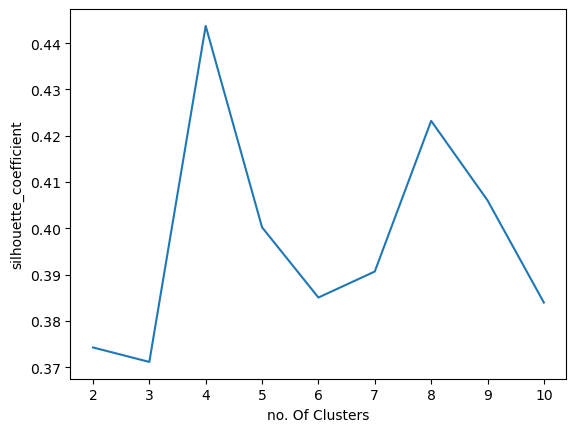

In [329]:
plt.plot(range(2,11),silhouette_coefficient)
plt.xticks(range(2,11))
plt.xlabel("no. Of Clusters")
plt.ylabel("silhouette_coefficient")
plt.show()

In [330]:
#as highest value is at 3 so k = 3 (3 cluster should b formed))

Unique ground truth labels: [0 1 2]
Optimal clusters from Silhouette Score: 3


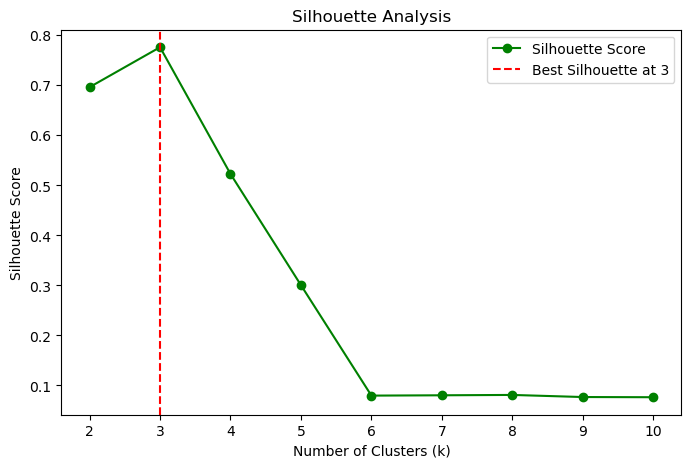

In [363]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import matplotlib.pyplot as plt

# Generate data
X, y = make_blobs(n_samples=1000, centers=3, n_features=10, random_state=42)

# Check actual labels (ground truth)
print(f"Unique ground truth labels: {np.unique(y)}")  # Should be [0, 1]

# K-Means clustering with multiple k values
wcss = []
silhouette_scores = []
K = range(2, 11)  # Testing different k values

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
    
    if k > 1:  # Silhouette score is not defined for k=1
        silhouette_scores.append(silhouette_score(X, labels))



# Find the best silhouette score
best_silhouette_k = K[np.argmax(silhouette_scores)]
print(f"Optimal clusters from Silhouette Score: {best_silhouette_k}")


plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'go-', label="Silhouette Score")  # Use K directly
plt.axvline(x=best_silhouette_k, color='red', linestyle='--', label=f'Best Silhouette at {best_silhouette_k}')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.legend()
plt.show()
